In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
import numpy as np
from scipy.stats import norm

from MNIST_VAE import Hyper, MnistVae

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
h = Hyper(epochs=50)
model = MnistVae(h)
        
history = model.fit(x_train, x_train,
        shuffle=True,
        epochs=h.epochs,
        batch_size=h.batch_size,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 190.4485 - val_loss: 171.7397
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 169.5743 - val_loss: 167.7304
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 166.0696 - val_loss: 165.0543
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 163.5999 - val_loss: 163.1233
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 161.5833 - val_loss: 161.1357
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 160.0424 - val_loss: 159.7178
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 158.8833 - val_loss: 158.8420
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 158.0225 - val_loss: 158.0472
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 157.3020 - val_loss: 157.3807
Epoch 10/50
60000/60000 [==============================] - 

In [6]:
history.history

{'val_loss': [171.73969421386718,
  167.73037170410157,
  165.05428527832032,
  163.12330017089843,
  161.13571701049804,
  159.71783462524414,
  158.84203353881836,
  158.04715469360352,
  157.38068572998046,
  157.08776382446288,
  156.43270141601562,
  156.05302001953126,
  155.8600619506836,
  155.5307308959961,
  155.36200912475587,
  155.05839553833007,
  154.96064010620117,
  154.31380737304687,
  154.39948287963867,
  154.33880126953125,
  154.09545486450196,
  154.25826141357422,
  153.8292074584961,
  153.9936442565918,
  153.71886306762696,
  153.4199481201172,
  153.24969055175782,
  153.21603988647462,
  153.9208662414551,
  152.93114227294922,
  153.2821955871582,
  153.33668106079102,
  153.59564926147462,
  152.64516998291015,
  153.1292546081543,
  152.61289016723632,
  152.55268981933594,
  152.53648513793945,
  152.18344619750977,
  152.10260513305664,
  152.7720748901367,
  153.26885818481446,
  152.1184698486328,
  152.2641423034668,
  152.0464714050293,
  151.7091

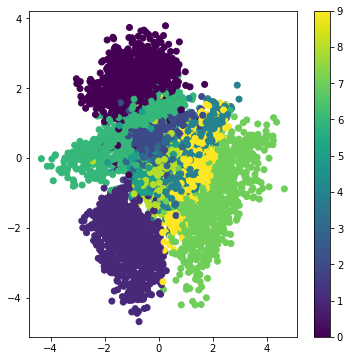

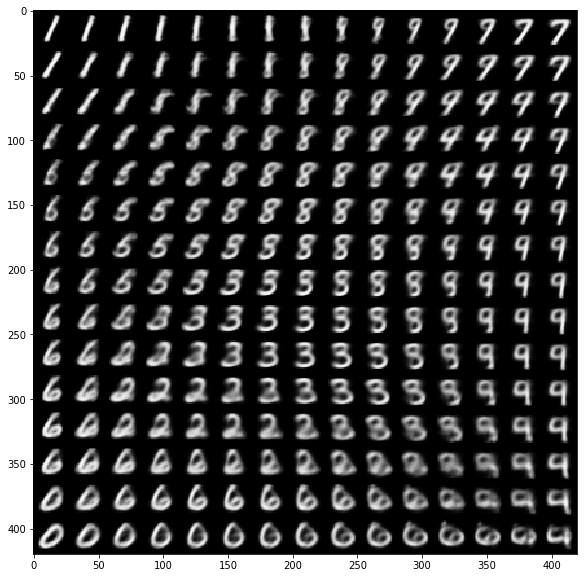

In [7]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = model.encoder.predict(x_test, batch_size=h.batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = model.generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

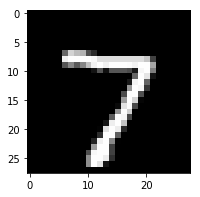

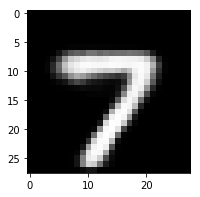

In [8]:
encoding = model.encode(x_test[:3])
decoding = model.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

In [9]:
model.save('models/mnist_test.h5')

OSError: Unable to create file (unable to open file: name = 'models/mnist_test.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [ ]:
model2 = MnistVae(h)
model2.load_weights('models/mnist_test.h5')

In [ ]:
encoding = model2.encode(x_test[:3])
decoding = model2.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()